# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

# Environment

In [2]:
class WindyGridWorld:

    def __init__(
            self,
            grid_size=(11, 14),
            stochasticity=0.1,
            visual=False):
        """
        Parameters
        ----------
        grid_size: tuple of the form (w, h)
            w: int, width of the grid
            h: int, height of the grid
        stochasticity: float from [0, 1]
            probability to take random action instead of 
            the intended one
        visual: boolean
            False: state is the agent's position
            True: state is image of the grid
        """
        self.w, self.h = grid_size
        self.stochasticity = stochasticity
        self.visual = visual

        # x position of the wall, y position of the hole
        self.x_wall = self.w // 2
        self.y_hole = self.h - 4

        self.reset()

    def reset(self):
        """ resets the environment
        """
        self.field = np.zeros((self.w, self.h))
        self.field[self.x_wall, :] = 1
        self.field[self.x_wall, self.y_hole] = 0
        self.field[0, 0] = 2
        self.pos = (0, 0)
        state = self.get_state()
        return state

    def step(self, a):
        """ take a step in the environment
        """

        if np.random.rand() < self.stochasticity:
            a = np.random.randint(4)

        self.field[self.pos] = 0
        self.pos = self.move(a)
        self.field[self.pos] = 2

        done = False
        reward = 0
        if self.pos == (self.w - 1, 0):
            # episode finished successfully
            done = True
            reward = 1
        next_state = self.get_state()
        return next_state, reward, done        

    def clip_xy(self, x, y):
        """ clip coordinates if they go beyond the grid
        """
        x_ = np.clip(x, 0, self.w - 1)
        y_ = np.clip(y, 0, self.h - 1)
        return x_, y_

    def wind_shift(self, x, y):
        """ apply wind shift to areas where wind is blowing
        """
        if x == 1:
            return self.clip_xy(x, y + 1)
        elif x > 1 and x < self.x_wall:
            return self.clip_xy(x, y + 2)
        else:
            return x, y

    def move(self, a):
        """ find valid coordinates of the agent after executing action
        """
        x, y = self.pos
        self.field[x, y] = 0
        x, y = self.wind_shift(x, y)
        if a == 0:
            x_, y_ = x + 1, y
        if a == 1:
            x_, y_ = x, y + 1
        if a == 2:
            x_, y_ = x - 1, y
        if a == 3:
            x_, y_ = x, y - 1
        # check if new position does not conflict with the wall
        if x_ == self.x_wall and y != self.y_hole:
            x_, y_ = x, y
        return self.clip_xy(x_, y_)

    def get_state(self):
        """ get state of the environment
        """
        if self.visual:
            state = np.rot90(self.field)[:, :, None]
        else:
            state = self.pos
        return state
    
    def draw_state(self):
        """ draws grid world
        """
        img = np.rot90(1-self.field)
        plt.imshow(img, cmap="gray")


# Testing

In [4]:
env = WindyGridWorld(grid_size=(7, 10))

(0, 0)


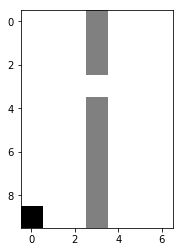

In [5]:
s_0 = env.reset()
print (s_0)
env.draw_state()

In [6]:
for i in range(20):
    a = np.random.randint(4)
    s_next, reward, done = env.step(a)
    print (s_next, reward, done)

(0, 1) 0 False
(0, 1) 0 False
(1, 1) 0 False
(1, 1) 0 False
(2, 2) 0 False
(2, 4) 0 False
(1, 6) 0 False
(0, 7) 0 False
(1, 7) 0 False
(0, 8) 0 False
(0, 7) 0 False
(0, 8) 0 False
(0, 8) 0 False
(0, 7) 0 False
(0, 7) 0 False
(0, 7) 0 False
(0, 6) 0 False
(0, 6) 0 False
(0, 7) 0 False
(0, 6) 0 False


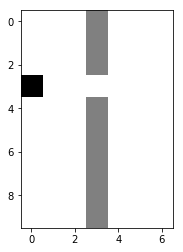

In [7]:
env.draw_state()